# Lab 9-2: Weight initialization

- Why good initialization?
- RBM / DBN
- Xavier / He initialization
- Code: mnist_nn_xavier
- Code: mnist_nn_deep

# Why good initialization?

weight(가중치)를 처음에 어떻게 initalize 하느냐에 따라 학습의 결과가 바뀐다.  
그럼 가장 좋은 방법 무엇일까?
- 0으로 초기화 한다면? 0으로 초기화를 시키면 backprop시 모든 weight가 모두 0이 되기 때문에 사용하면 안된다.

# RBM / DBN

### Restricted Boltzmann Machine

Hinton et al. (2006) “A Fast Learning Algorithm for Deep Belief
Nets”

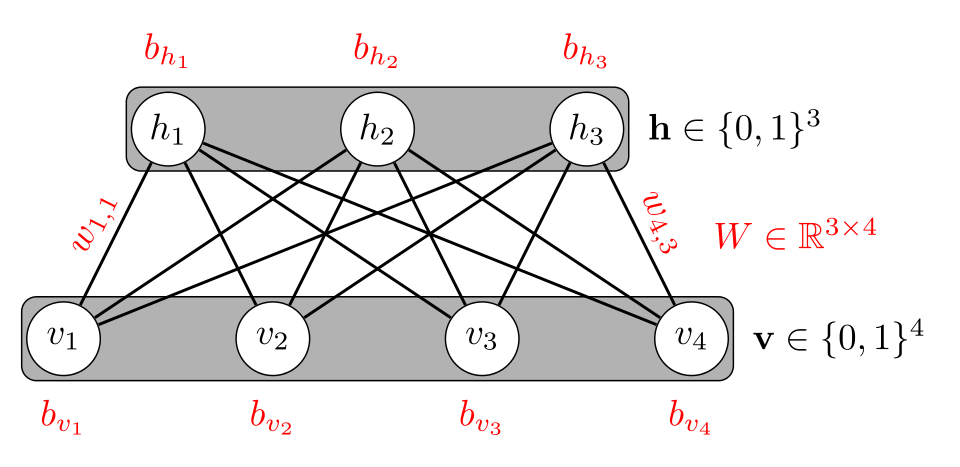

- Restricted: no connections within a layer
- KL divergence: compare actual to recreation

### How can we use RBM to initialize weights?

- Apply the RBM idea on adjacent two layers as a pre-training step
- Continue the first process to all layers
- This will set weights
- Example: Deep Belief Network
    - Weight initialized by RBM

### Deep Belief Network

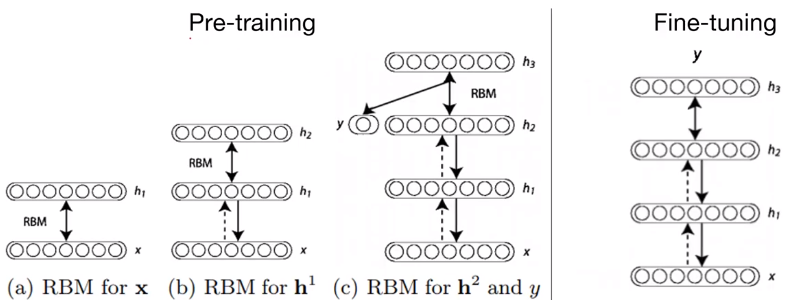

# Xavier / He initialization

- No need to use complicated RBM for weight initializations
- Simple methods are OK
    - **Xavier initialization**: X. Glorot and Y. Bengio, “Understanding the difficulty of training deep feedforward neural networks,” in International conference on artificial intelligence and statistics, 2010
    - **He initialization**: K. He, X. Zhang, S. Ren, and J. Sun, “Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification,” 2015

$$
n_{in} = number \ of \ input \ dims \\
n_{out} = number \ of \ output \ dims
$$

### Xavier Normal initialization

$$ W \sim N(0, \sqrt{\frac 2 {n_{in}+n_{out}}}) $$

### Xavier Uniform initialization

$$ W \sim U(-\sqrt{\frac 6 {n_{in}+n_{out}}},\;\sqrt{\frac 6 {n_{in}+n_{out}}}) $$

### He Normal initialization

$$ W \sim N(0, \sqrt{\frac 2 {n_{in}}}) $$

### He Uniform initialization

$$ W \sim U(-\sqrt{\frac 6 {n_{in}}},\;\sqrt{\frac 6 {n_{in}}}) $$

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
else:
    torch.manual_seed(777)

In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

# Code: mnist_nn_xavier

In [8]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [9]:
# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.0215, -0.0894,  0.0598,  ...,  0.0200,  0.0203,  0.1212],
        [ 0.0078,  0.1378,  0.0920,  ...,  0.0975,  0.1458, -0.0302],
        [ 0.1270, -0.1296,  0.1049,  ...,  0.0124,  0.1173, -0.0901],
        ...,
        [ 0.0661, -0.1025,  0.1437,  ...,  0.0784,  0.0977, -0.0396],
        [ 0.0430, -0.1274, -0.0134,  ..., -0.0582,  0.1201,  0.1479],
        [-0.1433,  0.0200, -0.0568,  ...,  0.0787,  0.0428, -0.0036]],
       requires_grad=True)

In [10]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [11]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.247093037
Epoch: 0002 cost = 0.093342982
Epoch: 0003 cost = 0.061566312
Epoch: 0004 cost = 0.043783706
Epoch: 0005 cost = 0.033269316
Epoch: 0006 cost = 0.026357865
Epoch: 0007 cost = 0.021722320
Epoch: 0008 cost = 0.018150117
Epoch: 0009 cost = 0.014932543
Epoch: 0010 cost = 0.013880354
Epoch: 0011 cost = 0.012277206
Epoch: 0012 cost = 0.011461562
Epoch: 0013 cost = 0.011612938
Epoch: 0014 cost = 0.010669780
Epoch: 0015 cost = 0.008404677
Learning finished


In [13]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9824000000953674
Label:  4
Prediction:  4


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# Code: mnist_nn_deep

In [14]:
# nn layers
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()

In [15]:
# xavier initialization
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0579, -0.1055,  0.0272,  ...,  0.1036,  0.0291, -0.0746],
        [ 0.0528,  0.0494, -0.0059,  ..., -0.0951, -0.0887, -0.0129],
        [-0.0953, -0.0510,  0.1030,  ..., -0.0493, -0.0581, -0.0280],
        ...,
        [ 0.0631,  0.0917,  0.0690,  ..., -0.0746, -0.0798,  0.0231],
        [ 0.0937,  0.0521, -0.0346,  ...,  0.0432, -0.0982, -0.0107],
        [-0.0888, -0.0723,  0.0511,  ...,  0.0530, -0.0830,  0.0624]],
       requires_grad=True)

In [16]:
# model
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3, relu, linear4, relu, linear5).to(device)

In [17]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.212079212
Epoch: 0002 cost = 0.088304490
Epoch: 0003 cost = 0.062981017
Epoch: 0004 cost = 0.052310064
Epoch: 0005 cost = 0.040148880
Epoch: 0006 cost = 0.034834955
Epoch: 0007 cost = 0.029275075
Epoch: 0008 cost = 0.026616711
Epoch: 0009 cost = 0.023001283
Epoch: 0010 cost = 0.022945864
Epoch: 0011 cost = 0.021419954
Epoch: 0012 cost = 0.020208403
Epoch: 0013 cost = 0.015865069
Epoch: 0014 cost = 0.015125655
Epoch: 0015 cost = 0.013439628
Learning finished


In [19]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

Accuracy: 0.9787999987602234
Label:  1
Prediction:  1
